## Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Open data

In [2]:
data_hour = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_hour_for_analysis.csv')

In [3]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47336 entries, 0 to 47335
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_dt     47336 non-null  object
 1   year        47336 non-null  int64 
 2   month       47336 non-null  int64 
 3   day         47336 non-null  int64 
 4   timestamp   43528 non-null  object
 5   species     47336 non-null  object
 6   direction1  47336 non-null  int64 
 7   direction2  47336 non-null  int64 
 8   local       47336 non-null  int64 
 9   age         9478 non-null   object
 10  sex         3455 non-null   object
 11  plumage     920 non-null    object
dtypes: int64(6), object(6)
memory usage: 4.3+ MB


In [4]:
data_hour.age.unique()

array([nan, '1', 'I', 'A', 'S', 'J', '4', '3', '2', 'Non-Juv',
       'non_adult'], dtype=object)

In [5]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47336 entries, 0 to 47335
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_dt     47336 non-null  object
 1   year        47336 non-null  int64 
 2   month       47336 non-null  int64 
 3   day         47336 non-null  int64 
 4   timestamp   43528 non-null  object
 5   species     47336 non-null  object
 6   direction1  47336 non-null  int64 
 7   direction2  47336 non-null  int64 
 8   local       47336 non-null  int64 
 9   age         9478 non-null   object
 10  sex         3455 non-null   object
 11  plumage     920 non-null    object
dtypes: int64(6), object(6)
memory usage: 4.3+ MB


## Keep only 2023 and migrating species

In [6]:
data_hour_2023 = data_hour[data_hour['year'].isin([2023])]
data_hour_2023.columns

Index(['date_dt', 'year', 'month', 'day', 'timestamp', 'species', 'direction1',
       'direction2', 'local', 'age', 'sex', 'plumage'],
      dtype='object')

In [7]:
# How many species have sex info?
data_hour_age_2023 = data_hour_2023[['date_dt', 'timestamp','species', 'age', 'direction1']]
#data_hour_age = data_hour_age.loc[data_hour_age['direction1'] > 0]
data_hour_age_2023.species.unique()

array(['Hirondelle de rivage', 'Martinet noir', 'Faucon crécerelle',
       'Aigle royal', 'Buse variable', 'Circaète Jean-le-Blanc',
       'Vautour fauve', 'Milan royal', 'Milan noir',
       'Hirondelle de fenêtre', 'Épervier d’Europe', 'Gypaète barbu',
       'Tarier des prés', 'Crave à bec rouge', 'corvidé spec.',
       'Pieris species', 'Faucon crécerellette', 'Aigle botté',
       'Vautour percnoptère', 'Bruant jaune', 'Linotte mélodieuse',
       'Grand Corbeau', 'Corneille noire', 'Pie bavarde',
       'Bondrée apivore', 'Faucon pèlerin', 'Faucon hobereau',
       'Balbuzard pêcheur', 'Hirondelle rustique', 'Busard des roseaux',
       'Vautour moine', 'Pipit des arbres', 'Pipit farlouse', 'Souci',
       'Paon du jour', 'Faucon crécerelle / Faucon crécerellette',
       'Morio', 'Vulcain', 'Pipit spioncelle',
       'Bergeronnette printanière', 'Bergeronnette grise',
       'Cisticole des joncs', 'Gobemouche noir', 'Mésange noire',
       'Busard cendré/pâle', 'Machaon', 'Hi

In [8]:
data_hour_sex_2023 = data_hour_2023[['date_dt', 'timestamp','species', 'sex', 'direction1']].dropna()
data_hour_sex_2023 = data_hour_sex_2023.loc[data_hour_sex_2023['direction1'] > 0]
data_hour_sex_2023.species.unique()

array(['Faucon crécerelle / Faucon crécerellette', 'Épervier d’Europe',
       'Busard des roseaux', 'Bondrée apivore', 'Busard Saint-Martin',
       'Busard cendré/pâle', 'Faucon crécerelle', 'Coucou gris',
       'Busard cendré', 'Circaète Jean-le-Blanc', 'Balbuzard pêcheur',
       'Citron', 'Souci', 'Faucon crécerellette', 'Faucon émerillon',
       'Bruant ortolan', 'Busard pâle'], dtype=object)

In [9]:
data_hour_plumage_2023 = data_hour_2023[['date_dt', 'timestamp','species', 'plumage', 'direction1']].dropna()
data_hour_plumage_2023 = data_hour_plumage_2023.loc[data_hour_plumage_2023['direction1'] > 0]
data_hour_plumage_2023.species.unique()

array(['Aigle botté', 'Buse variable', 'Bondrée apivore', 'Milan noir'],
      dtype=object)

In [10]:
# Plus
# Milan noir: âge
# Bondrée apivore: âge, sex
# Aigle boté plumage

## Milan noir classes d'âges pour 2023 (avec et sans indeterminés)

In [11]:
data_hour_age_2023.head()

,date_dt,timestamp,species,age,direction1
35224,2023-01-08,17:46:39,Hirondelle de rivage,NaN,1
35225,2023-01-08,10:00:00,Martinet noir,NaN,9
35226,2023-01-08,11:00:00,Martinet noir,NaN,54
35227,2023-01-08,14:00:00,Martinet noir,NaN,71
35228,2023-01-08,09:06:00,Faucon crécerelle,NaN,0


In [27]:
milan_noir_hour_age_2023 = data_hour_age_2023[data_hour_age_2023['species'].isin(['Milan noir'])] # only milan noir

# I = sup 1 an
# A = adult
# 1 = premiere annee
# J = juvenile
# remove deuxieme annee

milan_noir_hour_age_2023.fillna('indéterminé', inplace = True) # fill NA with 'indetermine'
milan_noir_hour_age_2023.replace('I', 'sup 1 an', inplace=True)
milan_noir_hour_age_2023.replace('A', 'adulte', inplace=True)
milan_noir_hour_age_2023.replace('1', 'première année', inplace=True)
milan_noir_hour_age_2023.replace('J', 'juvénile', inplace=True)
milan_noir_hour_age_2023 = milan_noir_hour_age_2023.loc[milan_noir_hour_age_2023['age'] != '2']

milan_noir_hour_age_2023.age.unique()

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/2755831542.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_noir_hour_age_2023.fillna('indéterminé', inplace = True) # fill NA with 'indetermine'
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/2755831542.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_noir_hour_age_2023.replace('I', 'sup 1 an', inplace=True)
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/2755831542.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

array(['indéterminé', 'sup 1 an', 'première année', 'adulte', 'juvénile'],
      dtype=object)

In [28]:
n_obs_age_milan_noir_NA = milan_noir_hour_age_2023.groupby(['age'])['direction1'].sum().reset_index()

n_obs_age_milan_noir_sans_NA = milan_noir_hour_age_2023.loc[milan_noir_hour_age_2023['age'] != 'indéterminé']
n_obs_age_milan_noir_sans_NA = n_obs_age_milan_noir_sans_NA.groupby(['age'])['direction1'].sum().reset_index()
n_obs_age_milan_noir_NA = n_obs_age_milan_noir_NA.loc[n_obs_age_milan_noir_NA['age'] != 'juvénile']

In [29]:
n_obs_age_milan_noir_NA

,age,direction1
0,adulte,152
1,indéterminé,62066
3,première année,5234
4,sup 1 an,11859


In [30]:
n_obs_age_milan_noir_sans_NA

,age,direction1
0,adulte,152
1,juvénile,38
2,première année,5234
3,sup 1 an,11859


<Figure size 1000x500 with 0 Axes>

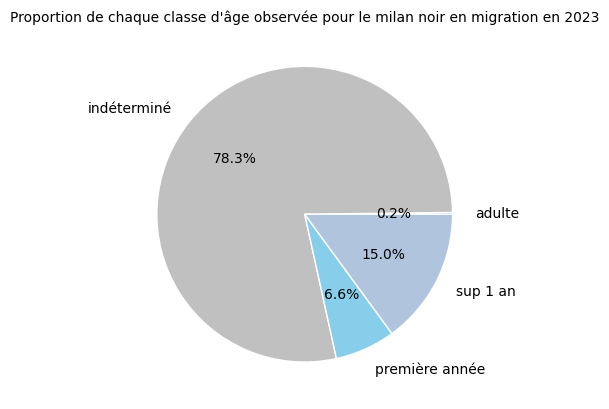

In [67]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots()
ax.pie(n_obs_age_milan_noir_NA.direction1,
       labels=n_obs_age_milan_noir_NA.age,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
       colors=['royalblue','silver', 'skyblue', 'lightsteelblue']);

plt.title("Proportion de chaque classe d'âge observée pour le milan noir en migration en 2023", fontsize=10);

plt.savefig('../figures/age_sex_plumage/age/prop_age_milan_noir_migration_avec_NA_2023.png')

<Figure size 1000x500 with 0 Axes>

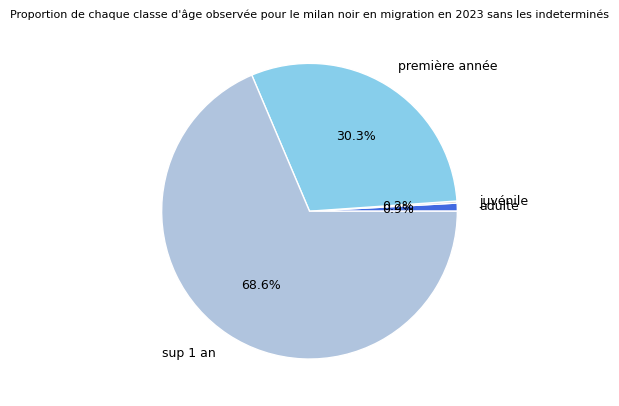

In [68]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots()
ax.pie(n_obs_age_milan_noir_sans_NA.direction1,
       labels=n_obs_age_milan_noir_sans_NA.age,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
       textprops={'fontsize': 9},
       colors=['royalblue','silver', 'skyblue', 'lightsteelblue']);

plt.title("Proportion de chaque classe d'âge observée pour le milan noir en migration en 2023 sans les indeterminés", fontsize=8);

plt.savefig('../figures/age_sex_plumage/age/prop_age_milan_noir_migration_sans_NA_2023.png')

## Bondrée apivore âge et sex

### Age

In [57]:
bondree_age_2023 = data_hour_age_2023[data_hour_age_2023['species'].isin(['Bondrée apivore'])]
bondree_age_2023

,date_dt,timestamp,species,age,direction1
35275,2023-01-08,10:48:03,Bondrée apivore,NaN,1
35276,2023-01-08,12:31:00,Bondrée apivore,NaN,0
35414,2023-01-09,NaN,Bondrée apivore,NaN,2
35415,2023-01-09,NaN,Bondrée apivore,1,1
35416,2023-01-09,NaN,Bondrée apivore,NaN,1
...,...,...,...,...,...
47261,2023-12-08,13:00:59,Bondrée apivore,A,1
47268,2023-12-08,15:17:11,Bondrée apivore,NaN,3
47274,2023-12-08,11:45:00,Bondrée apivore,A,1
47275,2023-12-08,12:51:54,Bondrée apivore,A,1


In [58]:
bondree_age_2023.fillna('indéterminé', inplace = True) # fill NA with 'indetermine'
bondree_age_2023.replace('I', 'sup 1 an', inplace=True)
bondree_age_2023.replace('A', 'adulte', inplace=True)
bondree_age_2023.replace('1', 'première année', inplace=True)
bondree_age_2023.replace('J', 'juvénile', inplace=True)
bondree_age_2023 = bondree_age_2023.loc[bondree_age_2023['age'] != 'Non-Juv']

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/2527121454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_age_2023.fillna('indéterminé', inplace = True) # fill NA with 'indetermine'
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/2527121454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_age_2023.replace('I', 'sup 1 an', inplace=True)
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/2527121454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [59]:
n_obs_age_bondree = bondree_age_2023.groupby(['age'])['direction1'].sum().reset_index()
n_obs_age_bondree

,age,direction1
0,adulte,840
1,indéterminé,4835
2,première année,336
3,sup 1 an,4


<Figure size 1000x500 with 0 Axes>

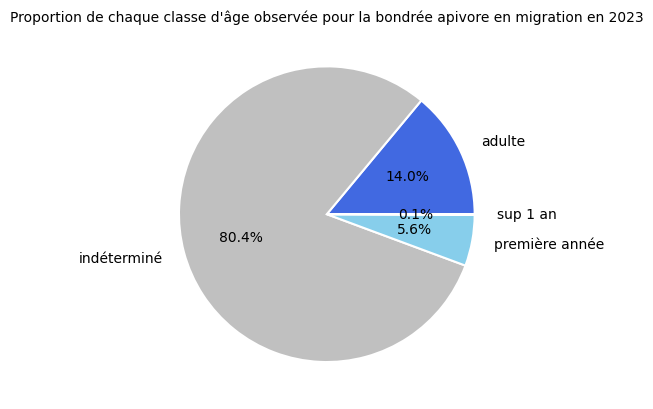

In [65]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots();

ax.pie(n_obs_age_bondree.direction1,
       labels=n_obs_age_bondree.age,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
       colors=['royalblue','silver', 'skyblue', 'lightsteelblue']);

plt.title("Proportion de chaque classe d'âge observée pour la bondrée apivore en migration en 2023", fontsize=10);

plt.savefig('../figures/age_sex_plumage/age/prop_age_bondree_apivore_migration_2023.png')

### Sex

In [40]:
bondree_sex_2023 = data_hour_sex_2023[data_hour_sex_2023['species'].isin(['Bondrée apivore'])]
bondree_sex_2023

,date_dt,timestamp,species,sex,direction1
35823,2023-02-09,16:18:36,Bondrée apivore,M,3
35827,2023-02-09,16:18:32,Bondrée apivore,F,3
36576,2023-05-08,16:41:01,Bondrée apivore,F,1
36578,2023-05-08,16:35:11,Bondrée apivore,F,1
36584,2023-05-08,13:47:02,Bondrée apivore,M,1
...,...,...,...,...,...
46993,2023-11-09,11:41:27,Bondrée apivore,FC,1
46999,2023-11-09,11:41:14,Bondrée apivore,M,2
47261,2023-12-08,13:00:59,Bondrée apivore,F,1
47274,2023-12-08,11:45:00,Bondrée apivore,M,1


In [41]:
bondree_sex_2023.fillna('indetermine', inplace = True) # fill NA with 'indetermine'
bondree_sex_2023.replace('F', 'femelle', inplace=True)
bondree_sex_2023.replace('M', 'mâle', inplace=True)
bondree_sex_2023 = bondree_sex_2023.loc[bondree_sex_2023['sex'] != 'FC']

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/1609827421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_sex_2023.fillna('indetermine', inplace = True) # fill NA with 'indetermine'
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/1609827421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bondree_sex_2023.replace('F', 'femelle', inplace=True)
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/1609827421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

In [42]:
n_obs_sex_bondree = bondree_sex_2023.groupby(['sex'])['direction1'].sum().reset_index()
n_obs_sex_bondree

,sex,direction1
0,femelle,463
1,mâle,255


<Figure size 1000x500 with 0 Axes>

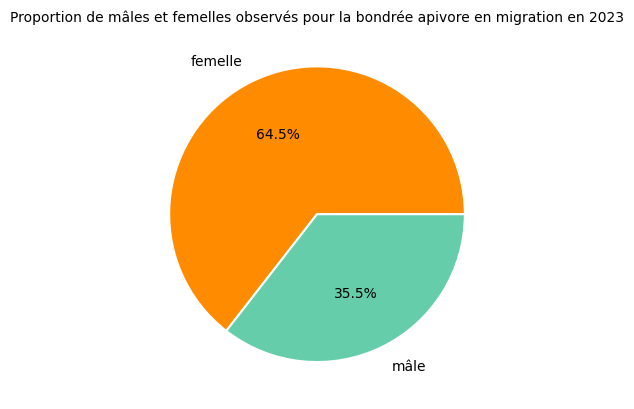

In [46]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots();

ax.pie(n_obs_sex_bondree.direction1,
       labels=n_obs_sex_bondree.sex,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
       colors=['darkorange','mediumaquamarine']);

plt.title("Proportion de mâles et femelles observés pour la bondrée apivore en migration en 2023", fontsize=10);

plt.savefig('../figures/age_sex_plumage/sex/prop_sex_bondree_apivore_migration_2023.png')

### Aigle botté

In [33]:
aigle_bote_plumage_2023 = data_hour_plumage_2023[data_hour_plumage_2023['species'].isin(['Aigle botté'])]

In [34]:
aigle_bote_plumage_2023.fillna('indetermine', inplace = True) # fill NA with 'indetermine'
aigle_bote_plumage_2023.replace('D', 'sombre', inplace=True)
aigle_bote_plumage_2023.replace('L', 'clair', inplace=True)
aigle_bote_plumage_2023 = aigle_bote_plumage_2023.loc[aigle_bote_plumage_2023['plumage'] != 'I']

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/495591121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aigle_bote_plumage_2023.fillna('indetermine', inplace = True) # fill NA with 'indetermine'
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/495591121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aigle_bote_plumage_2023.replace('D', 'sombre', inplace=True)
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_18028/495591121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [35]:
n_obs_aigle_botte_plumage = aigle_bote_plumage_2023.groupby(['plumage'])['direction1'].sum().reset_index()
n_obs_aigle_botte_plumage

,plumage,direction1
0,clair,72
1,sombre,60


<Figure size 1000x500 with 0 Axes>

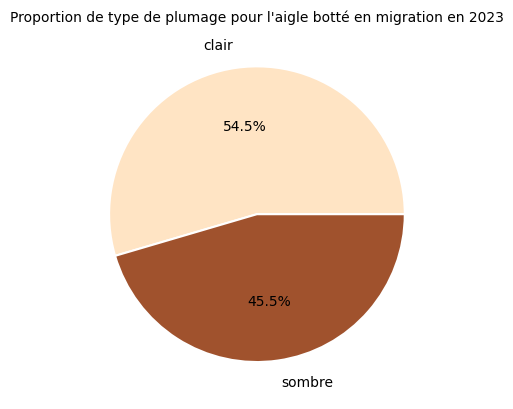

In [38]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots();

ax.pie(n_obs_aigle_botte_plumage.direction1,
       labels=n_obs_aigle_botte_plumage.plumage,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
       colors=['bisque','sienna']);

plt.title("Proportion de type de plumage pour l'aigle botté en migration en 2023", fontsize=10);

plt.savefig('../figures/age_sex_plumage/plumage/prop_plumage_aigle_botté_2023.png')